#**Predictive Analytics Submission - Heart Disease Prediction on UCI Heart Disease Data**

Welcome to my Predictive Analytics Submission, Heart Disease Prediction on UCI Heart Disease Data.

In this notebook, we will delve into the Heart Disease UCI dataset, which contains various clinical and demographic features of patients to predict the presence of heart disease. By exploring this dataset, we aim to gain insights into the factors that contribute to heart disease and develop a better understanding of the data.

##About Data

The UCI Heart Disease dataset contains a collection of features that are used to predict the presence of heart disease in patients. Each row in the dataset represents a different patient, and the columns represent various attributes related to their health and heart disease status.

##Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.



##Column Descriptions:
1. **id**  : Unique id for each patient
2. **age** : Age of the patient in years
3. **sex** : Gender (Male/Female)
4. **dataset** : Place of study (Cleveland, Hungary, Switzerland, VA Long Beach)
5. **cp** : chest pain type (typical angina, atypical angina, non-anginal, asymptomatic)
6. **trestbps** : resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
7. **chol** : serum cholesterol in mg/dl
8. **fbs** : if fasting blood sugar > 120 mg/dl (True/ Flase)
9. **restecg** : resting electrocardiographic results (normal, stt abnormality, lv hypertrophy)
10. **thalach** : maximum heart rate achieved
11. **exang** : exercise-induced angina (True/ False)
12. **oldpeak** : ST depression induced by exercise relative to rest
13. **slope** : the slope of the peak exercise ST segment (upsloping, flat, downsloping)
14. **ca** : number of major vessels (0-3) colored by fluoroscopy
15. **thal** : Thalassemia (normal; fixed defect; reversible defect)
16. **num**: the predicted attribute (0: no heart disease, 1,2,3,4: stage of heart disease)

##Acknowledgements
###Creators:
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

###Relevant Papers:
- Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
- David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."
- Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.

###Citation Request:
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. They would be:

1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

##1. Import Dataset

I used UCI heart disease data from Kaggle. ([Kaggle UCI Heart Disesase Data](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data)). The Original dataset is from UCI. [Original UCI Heart Disease Data](https://archive.ics.uci.edu/dataset/45/heart+disease).

Because, I'm using data from Kaggle, I downloaded the data using Kaggle API.

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rizki1994","key":"e2c181da4daa4a83ca5c75260be052ea"}'}

In [3]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d redwankarimsony/heart-disease-data

  0% 0.00/12.4k [00:00<?, ?B/s]
100% 12.4k/12.4k [00:00<00:00, 28.7MB/s]


In [6]:
import os
import zipfile
local_zip = '/content/heart-disease-data.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

##2. Load the Dataset

The data is loaded into heart_data Dataframe using Pandas dataframe.

In [7]:
import pandas as pd

heart_data = pd.read_csv('/content/heart_disease_uci.csv')
heart_data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


##3. Dataset Overview

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [9]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


* There are 920 rows, means the data of 920 human being.
* There are total 16 columns in the dataset, including id, dataset (location of the patient).
* The target feature num represents the ordinal numeric severity of the heart disease ([0, 1, 2, 3, 4]).
* There are 13 features or medical parameters (excluding id and dataset), which will be used to predict the target feature num (the intensity of the heart disease).
* There are some feature that doesn't have 920 data. It's indicate that feature has some missing values.

Because column 'id' and 'dataset' don't have connection to all column or feature, I decided to drop that columns.

In [10]:
heart_data = heart_data.drop(['id', 'dataset'], axis=1)
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,62,Male,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,55,Male,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,58,Male,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [11]:
heart_data.describe()

,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


From this Descriptive Statistics:
1. Age:

    a. Minimal Age of patient in this data is 28

    b. Average Age of patient is 54

    c. Maximal Age of patient is 77

2. Resting Blood Preasure ('tretbps'):

    Minimal value is 0, it is indicate either there are a null value or outliers in this feature

3. Cholestrol ('chol'):

    Minimal value is 0, it is indicate either there are a null value or outliers in this feature

4. ST Depression induced by exercise ('oldpeak'):

    Minimal value is -2.6, it is indicate an outliers in this feature








In [12]:
# Check the shape of the data
print('Number of rows in the dataset : ',heart_data.shape[0])
print('Number of columns in the dataset : ',heart_data.shape[1])

Number of rows in the dataset :  920
Number of columns in the dataset :  14


##4. Handling Missing Values

###4.1 Inspect Missing Values

Inspect missing values in data using isnull() function.

In [13]:
heart_data.isnull().sum()

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

Inspect the percentage of missing values in each feature.

In [14]:
round((heart_data.isnull().sum()[heart_data.isnull().sum()>0]/len(heart_data)*100),1).sort_values(ascending=False)

ca          66.4
thal        52.8
slope       33.6
fbs          9.8
oldpeak      6.7
trestbps     6.4
exang        6.0
thalch       6.0
chol         3.3
restecg      0.2
dtype: float64

From the observation:

1. There are 10 features with missing values.
2. There are 7 features with percentage of missing values is less than 10%.
3. There are 3 features with persentage of missing values is high (30%, 50%, 60%).

Because there are a lot of missing values, it won't be good too drop the missing values.

So, this missing values is handling with Iterative Imputer using Machine Learning Model, Random Forest Classifier, and Random Forest Regressor to predict the missing values.

In [15]:
missing_data_cols = heart_data.isnull().sum()[heart_data.isnull().sum() > 0].index.tolist()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [16]:
# find only categorical columns
cat_cols = heart_data.select_dtypes(include='object').columns.tolist()
# find only numerical columns
num_cols = heart_data.select_dtypes(exclude='object').columns.tolist()

print(f'Categorical Columns: {cat_cols}')
print(f'Numerical Columns: {num_cols}')

Categorical Columns: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
Numerical Columns: ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']


In [17]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

##4.2 Iterative Imputer

In [18]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error,mean_absolute_error,r2_score


def impute_categorical_missing_data(passed_col):

    heart_data_null = heart_data[heart_data[passed_col].isnull()]
    heart_data_not_null = heart_data[heart_data[passed_col].notnull()]

    X = heart_data_not_null.drop(passed_col, axis=1)
    y = heart_data_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = heart_data_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(heart_data_null) > 0:
        heart_data_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            heart_data_null[passed_col] = heart_data_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    heart_data_combined = pd.concat([heart_data_not_null, heart_data_null])

    return heart_data_combined[passed_col]

def impute_continuous_missing_data(passed_col):

    heart_data_null = heart_data[heart_data[passed_col].isnull()]
    heart_data_not_null = heart_data[heart_data[passed_col].notnull()]

    X = heart_data_not_null.drop(passed_col, axis=1)
    y = heart_data_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = heart_data_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(heart_data_null) > 0:
        heart_data_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    heart_data_combined = pd.concat([heart_data_not_null, heart_data_null])

    return heart_data_combined[passed_col]

In [19]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((heart_data[col].isnull().sum() / len(heart_data)) * 100, 2))+"%")
    if col in categorical_cols:
        if col == '66.4':
            col = 'chol'
        heart_data[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        heart_data[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values trestbps : 6.41%
MAE = 13.398843930635838 

RMSE = 17.208683988738866 

R2 = 0.07535906517891822 

Missing Values chol : 3.26%
MAE = 64.59915730337079 

RMSE = 87.16147958263277 

R2 = 0.3981783137015037 

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 79.52 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 60.87 accuracy

Missing Values thalch : 5.98%
MAE = 16.98849710982659 

RMSE = 21.711430102824334 

R2 = 0.31456516045056415 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 78.61 accuracy

Missing Values oldpeak : 6.74%
MAE = 0.5639941860465116 

RMSE = 0.7926312120854775 

R2 = 0.40145020611754156 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 67.48 accuracy

Missing Values ca : 66.41%
The feature 'ca' has been imputed with 61.29 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 70.11 accuracy



Result of Iterative Imputer process:

1. **trestbps (Blood Pressure):**

* Missing Percentage: 6.41%
* MAE (Mean Absolute Error): 13.41
* RMSE (Root Mean Squared Error): 17.33
* R2 (R-squared): 0.06

* Inferences:

    a. The missing values in 'trestbps' were imputed successfully.

    b.The imputed values seem to have reasonable accuracy based on the provided MAE, RMSE, and R2 metrics.

2. **chol (Serum Cholesterol):**

* Missing Percentage: 3.26%
* MAE: 63.07
* RMSE: 86.67
* R2: 0.4

* Inferences:

    a. Imputation for 'chol' appears to be successful with relatively low MAE and RMSE.

    b. The R-squared value indicates a decent level of accuracy in imputing missing values.

3. **fbs (Fasting Blood Sugar):**

* Missing Percentage: 9.78%
* Imputation Accuracy: 78.92%

* Inferences:

    a. 'fbs' has been imputed with a high accuracy of 78.92%.
    b. The imputation method seems effective for this feature.

4. **restecg (Resting Electrocardiographic Results):**

* Missing Percentage: 0.22%
* Imputation Accuracy: 61.41%

* Inferences:

    a. 'restecg' has been imputed with an accuracy of 61.41%.
    b. The imputation method appears reasonable for this feature.

5. **thalch (Maximum Heart Rate Achieved):**

* Missing Percentage: 5.98%
* MAE: 17.22
* RMSE: 21.94
* Inferences:

    Imputation for 'thalch' seems to have moderate accuracy, as indicated by MAE and RMSE.

6. **exang (Exercise-Induced Angina):**

* Missing Percentage: 5.98%
* Imputation Accuracy: 75.72%
* Inferences:

    a. 'exang' has been imputed with a high accuracy of 75.72%.
    b. The imputation method seems effective for this feature.

7. **oldpeak (ST depression induced by exercise relative to rest):**

* Missing Percentage: 6.74%
* MAE: 0.57
* RMSE: 0.79
* Inferences:

    a. The missing values in 'oldpeak' were imputed successfully.

    b.The imputed values seem to have reasonable accuracy based on the provided MAE, RMSE.

8. **slope (The slope of the peak exercise ST segment):**

* Missing Percentage: 33.59%
* Imputation Accuracy: 65.04%
* Inferences:

    'slope' has a high percentage of missing values, but the imputation accuracy is decent at 65.04%.

9. **ca (Number of major vessels (0-3) colored by fluoroscopy):**

* Missing Percentage: 66.41%
* Imputation Accuracy: 65.04%
* Inferences:

    'ca' has a high percentage of missing values, but the imputation accuracy is moderate at 61.29%.

10. **thal (Thalassemia):**

* Missing Percentage: 52.83%
* Imputation Accuracy: 73.56%
* Inferences:

    'thal' has a high percentage of missing values, but the imputation accuracy is decent at 72.41%.

Overall, the imputation process appears to have performed well for most features, considering the provided metrics. It's important to note that the success of imputation may depend on the specific characteristics of the dataset and the imputation methods used. Always validate imputation results and consider the context of the data when drawing conclusions.

##4.3 Result

After Iterative Imputer process, there are no missing values in the dataset

In [20]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [21]:
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.00,233.0,True,lv hypertrophy,150.00,False,2.300,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.00,286.0,False,lv hypertrophy,108.00,True,1.500,flat,3.0,normal,2
2,67,Male,asymptomatic,120.00,229.0,False,lv hypertrophy,129.00,True,2.600,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.00,250.0,False,normal,187.00,False,3.500,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.00,204.0,False,lv hypertrophy,172.00,False,1.400,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,asymptomatic,127.00,333.0,True,st-t abnormality,154.00,False,0.000,upsloping,0.0,normal,1
916,62,Male,typical angina,143.02,139.0,False,st-t abnormality,143.50,False,2.058,upsloping,0.0,reversable defect,0
917,55,Male,asymptomatic,122.00,223.0,True,st-t abnormality,100.00,False,0.000,flat,1.0,fixed defect,2
918,58,Male,asymptomatic,148.77,385.0,True,lv hypertrophy,144.43,True,2.409,flat,0.0,reversable defect,0


##5. Handling Outliers

After handling with missing values, the next step is to handling outliers. Because outliers can disturb model to find correlation within the dataset.

I will use IQR method and Boxplot to check outliers in this data

###5.1 Using IQR Methode

In [22]:
Q1 = heart_data[num_cols].quantile(0.25)
Q3 = heart_data[num_cols].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((heart_data[num_cols] < (Q1 - 1.5 * IQR)) | (heart_data[num_cols] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

age           0
trestbps     28
chol        185
thalch        2
oldpeak       3
ca           23
num           0
dtype: int64

Upon identifying outliers for the specified continuous features, we found the following:

* **trestbps :** 26 outliers
* **chol :** 185 outliers
* **thalach :** 2 outlier
* **oldpeak :** 3 outliers
* **age :** No outliers
* **num :** No Outlirs
* **ca :** 20 Outliers

###5.2 Using Boxplot

<Axes: xlabel='trestbps'>

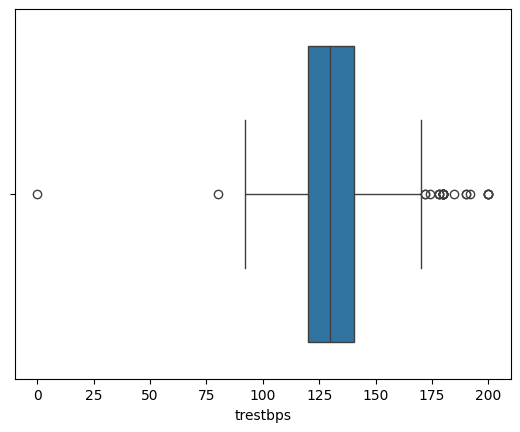

In [23]:
sns.boxplot(x=heart_data['trestbps'])

<Axes: xlabel='chol'>

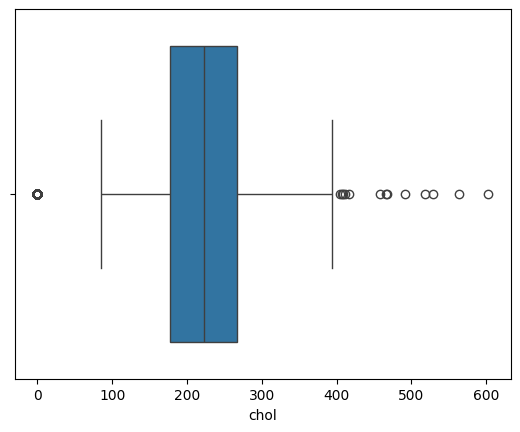

In [24]:
sns.boxplot(x=heart_data['chol'])

<Axes: xlabel='thalch'>

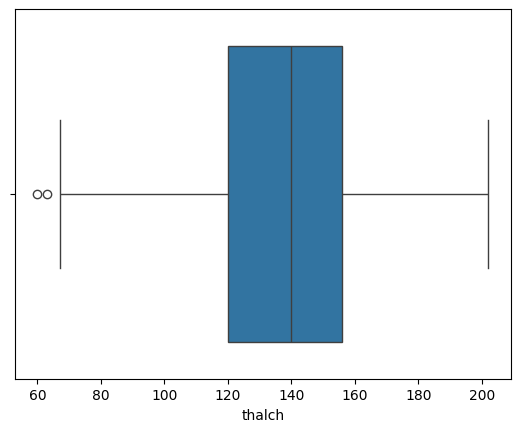

In [25]:
sns.boxplot(x=heart_data['thalch'])

<Axes: xlabel='oldpeak'>

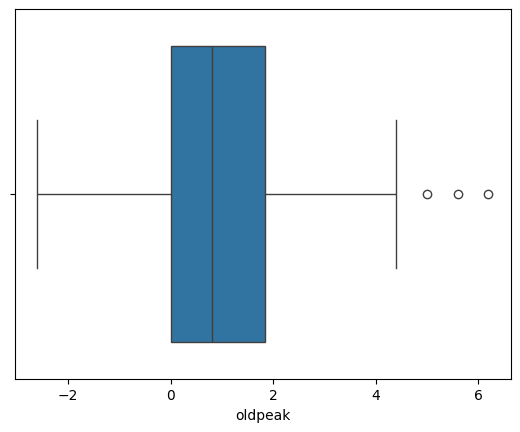

In [26]:
sns.boxplot(x=heart_data['oldpeak'])

<Axes: xlabel='ca'>

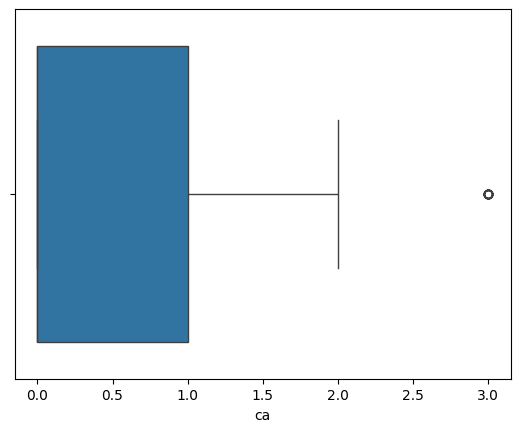

In [27]:
sns.boxplot(x=heart_data['ca'])

###5.3 Dealing the Outliers

Because there are a lot of outliers, I decided to handling outliers one by one.

####5.3.1 Tresbps Outliers Handling


In [28]:
heart_data['trestbps'].describe()

count    920.000000
mean     132.531326
std       18.563475
min        0.000000
25%      120.000000
50%      130.000000
75%      140.447500
max      200.000000
Name: trestbps, dtype: float64

There are some zero values in the column trestbps so Blood Pressure can never be 0. Therefore trestbps with 0 value can be drop.

In [29]:
# remove rows with values less than 80 in the 'trestbps' column
heart_data = heart_data[heart_data['trestbps'] >= 80]

In [30]:
heart_data['trestbps'].describe()

count    919.000000
mean     132.675539
std       18.050586
min       80.000000
25%      120.000000
50%      130.000000
75%      140.595000
max      200.000000
Name: trestbps, dtype: float64

After that, the minimal value of trestbps is 80.

In [31]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 919 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       919 non-null    int64  
 1   sex       919 non-null    object 
 2   cp        919 non-null    object 
 3   trestbps  919 non-null    float64
 4   chol      919 non-null    float64
 5   fbs       919 non-null    object 
 6   restecg   919 non-null    object 
 7   thalch    919 non-null    float64
 8   exang     919 non-null    object 
 9   oldpeak   919 non-null    float64
 10  slope     919 non-null    object 
 11  ca        919 non-null    float64
 12  thal      919 non-null    object 
 13  num       919 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 107.7+ KB


Dataframe size after trestbps outlier handling is 919 data.

####5.3.2 Thalach Outliers Handling

Using information from Boxplot, in thalch column values can be start 71 so removed less than 71

In [32]:
# remove rows with values less than 71 in the 'thalch' column
heart_data = heart_data[heart_data['thalch'] >= 71]

In [33]:
heart_data['thalch'].describe()

count    914.000000
mean     137.709311
std       24.849286
min       71.000000
25%      120.000000
50%      140.000000
75%      156.000000
max      202.000000
Name: thalch, dtype: float64

After handling, the minimal value is 71.

In [34]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 914 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       914 non-null    int64  
 1   sex       914 non-null    object 
 2   cp        914 non-null    object 
 3   trestbps  914 non-null    float64
 4   chol      914 non-null    float64
 5   fbs       914 non-null    object 
 6   restecg   914 non-null    object 
 7   thalch    914 non-null    float64
 8   exang     914 non-null    object 
 9   oldpeak   914 non-null    float64
 10  slope     914 non-null    object 
 11  ca        914 non-null    float64
 12  thal      914 non-null    object 
 13  num       914 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 107.1+ KB


Dataframe size after trestbps outlier handling is 914 data.

####5.3.3 Oldpeak Outliers Handling

There are 3 outliers in oldpeak column.
The outtliers is handled using IQR method.

In [35]:
# remove outliers in 'oldpeak' column
Q1 = heart_data['oldpeak'].quantile(0.25)
Q3 = heart_data['oldpeak'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
heart_data = heart_data[(heart_data['oldpeak'] >= lower_bound) & (heart_data['oldpeak'] <= upper_bound)]


####5.3.4 Chol Outliers Handling

In [36]:
heart_data['chol'].describe()

count    911.000000
mean     200.250022
std      108.248833
min        0.000000
25%      177.500000
50%      223.000000
75%      267.000000
max      603.000000
Name: chol, dtype: float64

There are some zero values in the column cholestrol so cholestrol can never be 0.

In [37]:
# print the row from df where chol value is 0
print("zero_counts :",(heart_data['chol'] == 0).sum())
# remove this row from data
heart_data = heart_data[heart_data['chol'] != 0]

zero_counts : 167


There are 167 zero values in chol column.

From information on Boxplot, I decided to filter chol between 126 and 400.

In [38]:
# remove values less than 126
heart_data = heart_data[heart_data['chol'] >= 126]
# remove values greater than 400
heart_data = heart_data[heart_data['chol'] <= 400]

In [39]:
heart_data['chol'].describe()

count    728.000000
mean     242.222212
std       48.265989
min      126.000000
25%      208.000000
50%      236.500000
75%      274.000000
max      394.000000
Name: chol, dtype: float64

After handling, the minimal value is 126.

In [40]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       728 non-null    int64  
 1   sex       728 non-null    object 
 2   cp        728 non-null    object 
 3   trestbps  728 non-null    float64
 4   chol      728 non-null    float64
 5   fbs       728 non-null    object 
 6   restecg   728 non-null    object 
 7   thalch    728 non-null    float64
 8   exang     728 non-null    object 
 9   oldpeak   728 non-null    float64
 10  slope     728 non-null    object 
 11  ca        728 non-null    float64
 12  thal      728 non-null    object 
 13  num       728 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 85.3+ KB


Dataframe size after chol outlier handling is 728 data.

In [41]:
heart_data.describe()

,age,trestbps,chol,thalch,oldpeak,ca,num
count,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000
mean,52.894231,133.104904,242.222212,140.911964,0.964284,0.417582,0.828297
std,9.511945,17.374747,48.265989,24.408028,1.088618,0.748272,1.101167
min,28.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,46.000000,120.000000,208.000000,122.865000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,236.500000,142.000000,0.600000,0.000000,0.000000
75%,59.000000,140.000000,274.000000,160.000000,1.800000,1.000000,1.000000
max,77.000000,200.000000,394.000000,202.000000,4.400000,3.000000,4.000000


This is the final Statistical data after Handling Missing Values dan Handling Outliers Values.

##6. EDA (Exploratory Data Analysis)



###6.1 Univariate Analysis

####6.1.1 Categorical Features

In [42]:
numerical_features = ['age','trestbps','chol','thalch','oldpeak']
categorical_features = ['sex','cp','fbs','restecg','exang','slope','ca','thal']

        Total Samples  Percentage
Male              551        75.7
Female            177        24.3


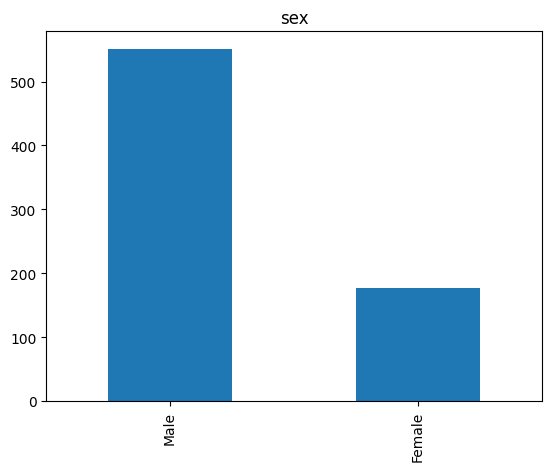

In [43]:
feature = categorical_features[0]
count = heart_data[feature].value_counts()
percent = 100*heart_data[feature].value_counts(normalize=True)

df = pd.DataFrame({'Total Samples':count, 'Percentage':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

From graphic plot, this data set is dominated by Male patients with 75,7% percentage.

                 Total Samples  Percentage
asymptomatic               355        48.8
non-anginal                167        22.9
atypical angina            165        22.7
typical angina              41         5.6


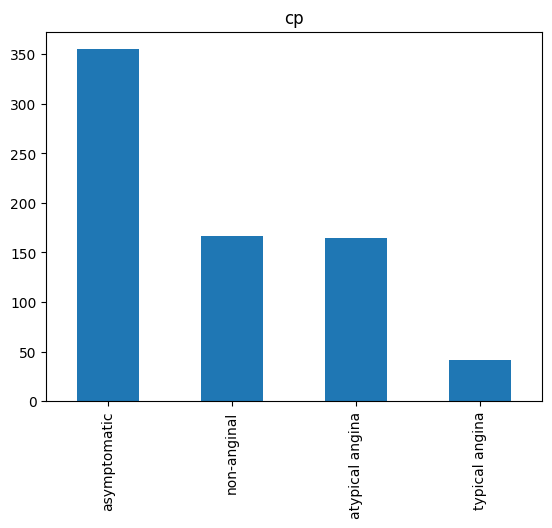

In [44]:
feature = categorical_features[1]
count = heart_data[feature].value_counts()
percent = 100*heart_data[feature].value_counts(normalize=True)

df = pd.DataFrame({'Total Samples':count, 'Percentage':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

48,8% patients have asymptomatic chest pain, where 22,9% have non-anginal chest pain type, 22,7% have atypical anginan chest pain type, and the rest has typial angina

       Total Samples  Percentage
False            609        83.7
True             119        16.3


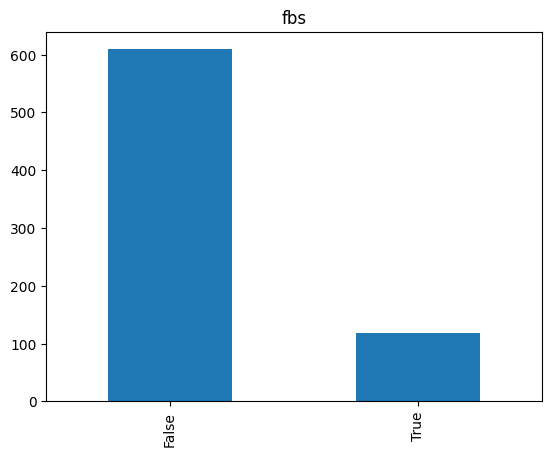

In [45]:
feature = categorical_features[2]
count = heart_data[feature].value_counts()
percent = 100*heart_data[feature].value_counts(normalize=True)

df = pd.DataFrame({'Total Samples':count, 'Percentage':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Most of the patients don't have fasting blood sugar > 120 mg/dl, with 83,7% percentage.

                  Total Samples  Percentage
normal                      431        59.2
lv hypertrophy              172        23.6
st-t abnormality            125        17.2


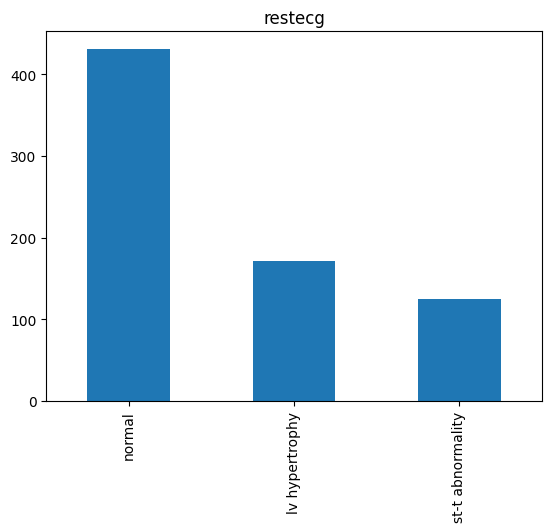

In [46]:
feature = categorical_features[3]
count = heart_data[feature].value_counts()
percent = 100*heart_data[feature].value_counts(normalize=True)

df = pd.DataFrame({'Total Samples':count, 'Percentage':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Half of the patients have normal resting electrocardiographic results, where the others 23,6% of patients have Iv hypertrophy and the rest have st-t abnormality resting electrocardiographic results.

       Total Samples  Percentage
False            455        62.5
True             273        37.5


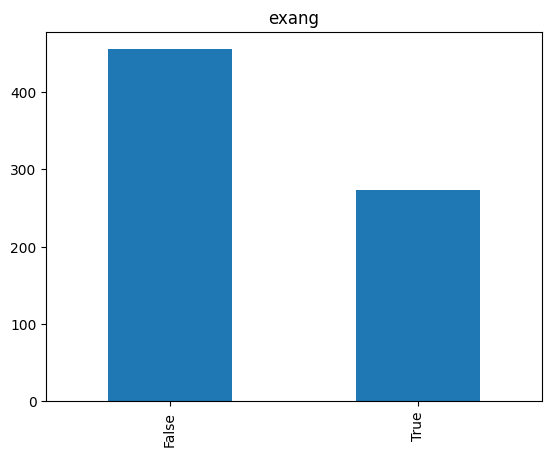

In [47]:
feature = categorical_features[4]
count = heart_data[feature].value_counts()
percent = 100*heart_data[feature].value_counts(normalize=True)

df = pd.DataFrame({'Total Samples':count, 'Percentage':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

62,1% patients don't have exercise-induced angina, where the rest have it.

             Total Samples  Percentage
flat                   339        46.6
upsloping              339        46.6
downsloping             50         6.9


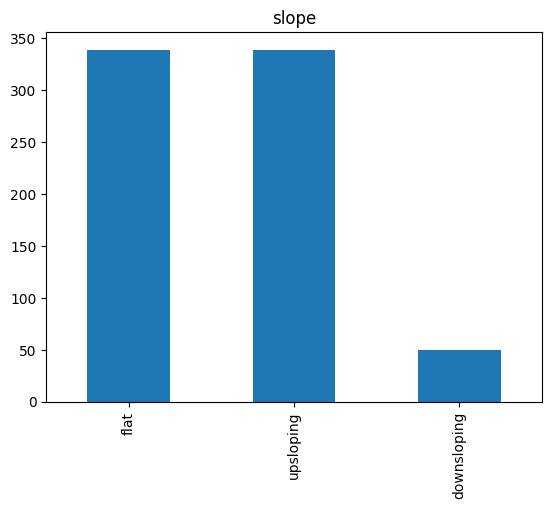

In [48]:
feature = categorical_features[5]
count = heart_data[feature].value_counts()
percent = 100*heart_data[feature].value_counts(normalize=True)

df = pd.DataFrame({'Total Samples':count, 'Percentage':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

The majority of patients have flat and upsloping slope of the peak exercise ST segment with 47,9% and 45,5% percentage, where the rest have downsloping slope of the peak exercise ST segment.

     Total Samples  Percentage
0.0            518        71.2
1.0            137        18.8
2.0             52         7.1
3.0             21         2.9


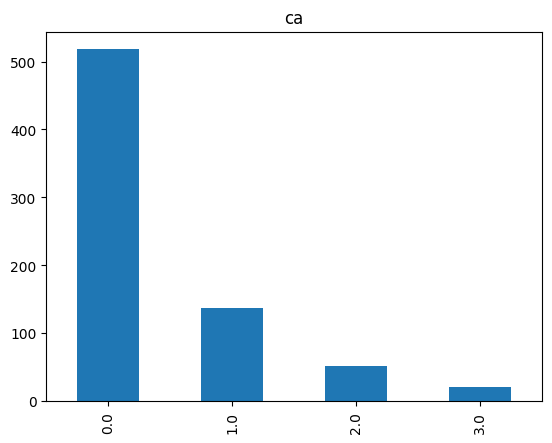

In [49]:
feature = categorical_features[6]
count = heart_data[feature].value_counts()
percent = 100*heart_data[feature].value_counts(normalize=True)

df = pd.DataFrame({'Total Samples':count, 'Percentage':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Most of the patients have 0 of major vessels with 70,7% percentage, where the rest 19% have 1, 7,7% have 2 and 2,6% have 3 of major vessels.

                   Total Samples  Percentage
normal                       352        48.4
reversable defect            338        46.4
fixed defect                  38         5.2


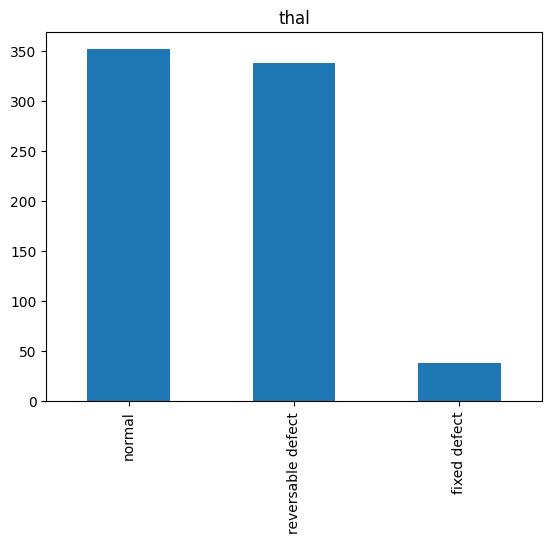

In [50]:
feature = categorical_features[7]
count = heart_data[feature].value_counts()
percent = 100*heart_data[feature].value_counts(normalize=True)

df = pd.DataFrame({'Total Samples':count, 'Percentage':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Most of the patients have normal and reversible defect of Thalassemia with 48,5% and 45,9% percetage, where the rest have fixed defect of Thalassemia

####6.1.2 Numerical Features

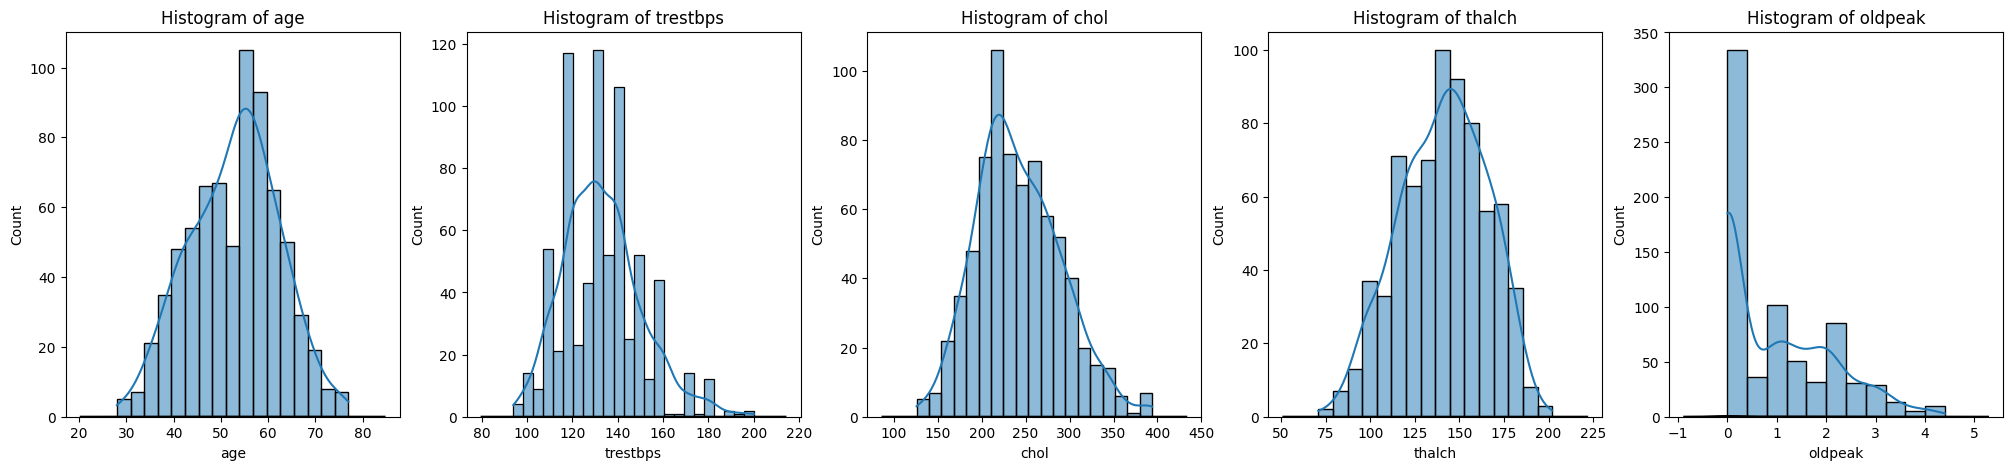

In [51]:
data = heart_data[numerical_features]

# Plot histograms with distribution lines for multiple numerical features
fig, axes = plt.subplots(nrows=1, ncols=len(data.columns), figsize=(25, 5))

for idx, column in enumerate(data.columns):
    ax = sns.histplot(data[column], kde=True, ax=axes[idx])
    sns.kdeplot(data[column], color='black', ax=ax)
    ax.set_title(f'Histogram of {column}')

plt.show()

From above plot can be concluded:

1. **Age  :**There is a peak in late 50's til 60's from the age data
2. **Trest bps (Blood Pressure) :** data is concentrated around 120-140 mmHg
3. **Chol (Serum Cholesterol)  :** Most patients has Cholestrol between 200 - 300
4. **Thalch (Maximum Heart Rate Achieved)  :** Majority of patients achieve a heart rate between 125 - 175 bpm during a test.
5. **Oldpeak (ST depression induced by exercise relative to rest)  :** Most of the values are concentrated towards 0, indicating that many individuals did not experience significant ST depression during exercise


###6.2 Bivariate Analysis

For this bivariate analysis on the dataset's features with respect to the target variable:

1.  For continuous data: I am going to use bar plots to showcase the average value of each feature for the different target classes, and KDE plots to understand the distribution of each feature across the target classes. This aids in discerning how each feature varies between the two target outcomes.

2. For categorical data : To show correlation between categorical values vs target values, I am going to use Chi-square test of independence.  This statistical test assesses whether there is a significant association between two categorical variables.

####6.2.1 Numerical features vs target


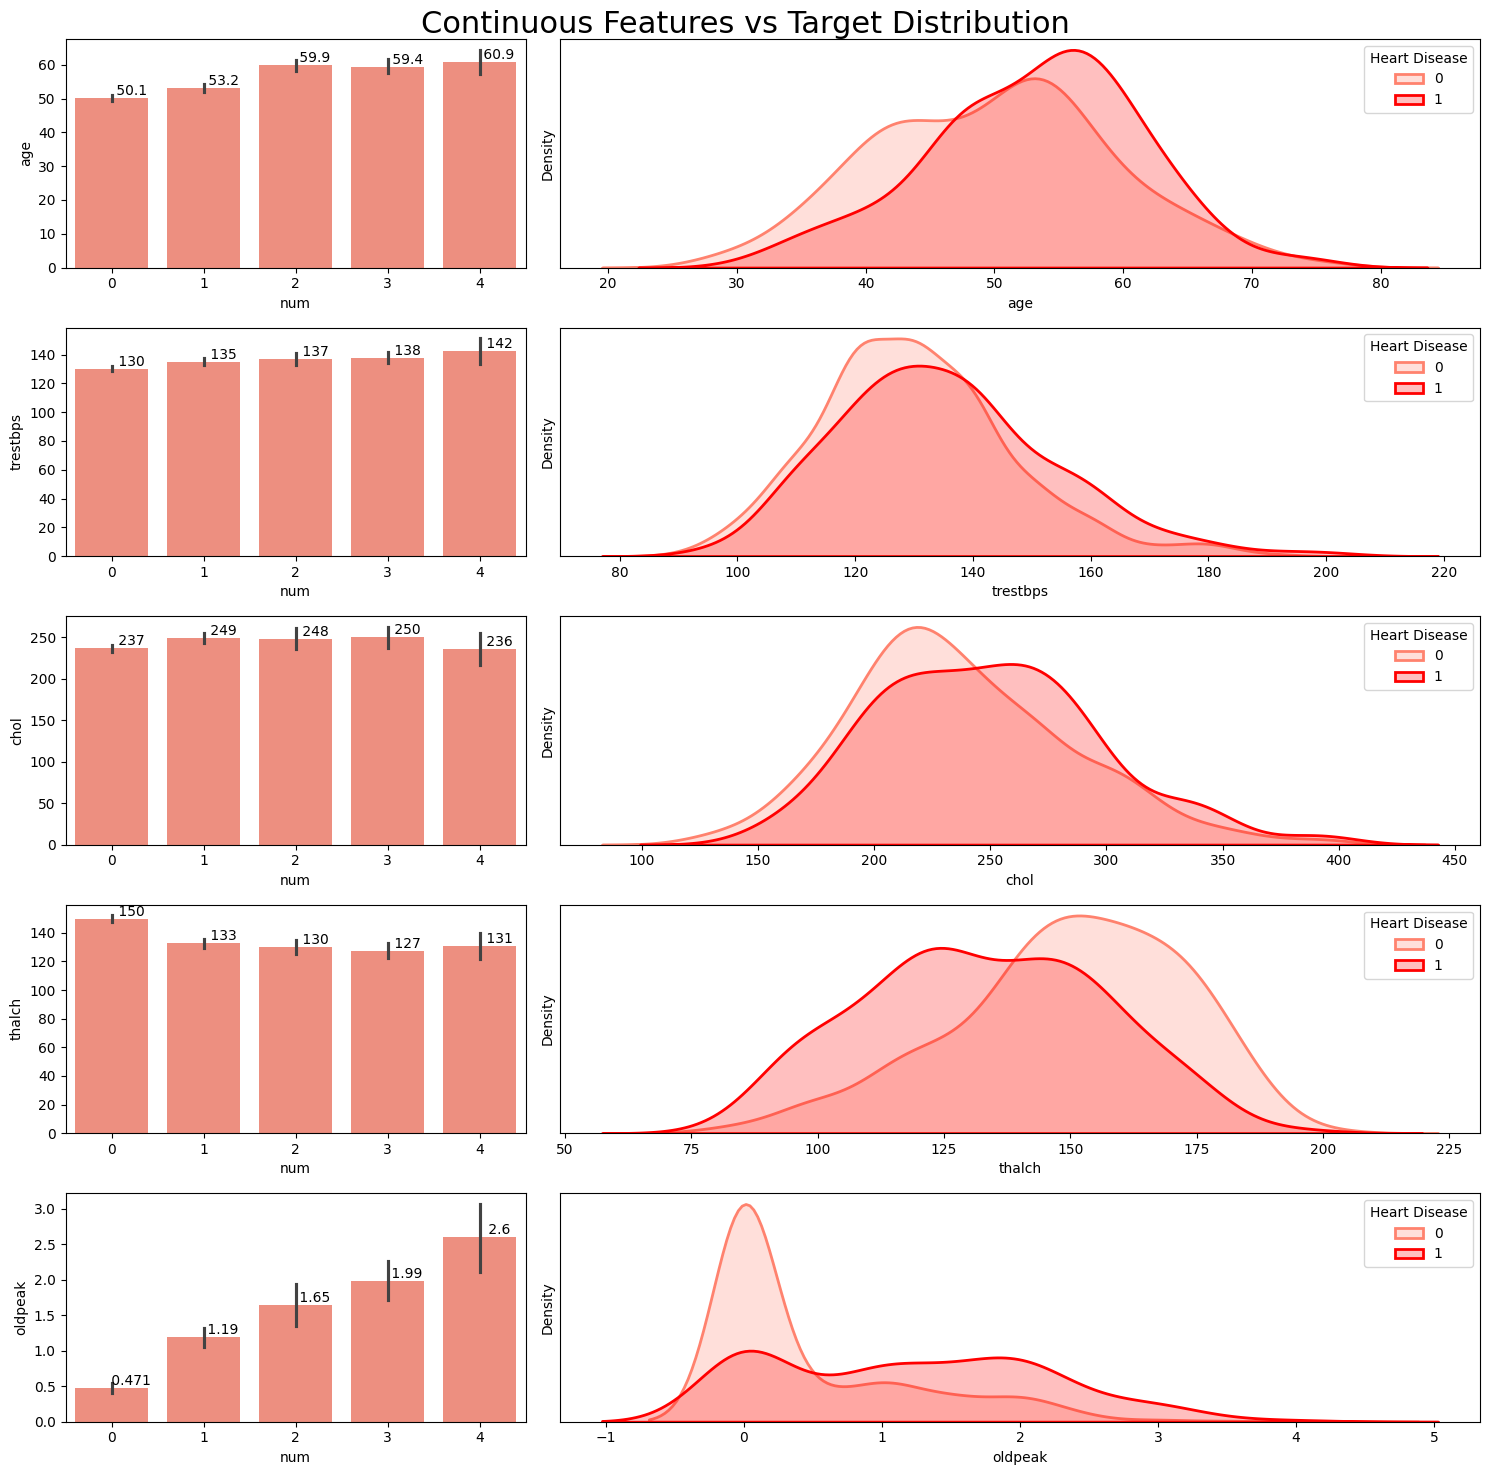

In [52]:
# Set color palette
sns.set_palette(['#ff826e', 'red'])

# Create the subplots
fig, ax = plt.subplots(len(numerical_features), 2, figsize=(15,15), gridspec_kw={'width_ratios': [1, 2]})

# Loop through each continuous feature to create barplots and kde plots
for i, col in enumerate(numerical_features):
    # Barplot showing the mean value of the feature for each target category
    graph = sns.barplot(data=heart_data, x="num", y=col, ax=ax[i,0])

    # KDE plot showing the distribution of the feature for each target category
    sns.kdeplot(data=heart_data[heart_data["num"]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
    sns.kdeplot(data=heart_data[heart_data["num"]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Heart Disease', loc='upper right')

    # Add mean values to the barplot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')

# Set the title for the entire figure
plt.suptitle('Continuous Features vs Target Distribution', fontsize=22)
plt.tight_layout()
plt.show()

**Inferences:**


1.   **Age (age)**: The distributions show a slight shift with patients having heart disease being a bit younger on average than those without. The mean age for patients without heart disease is higher.
2.  **Resting Blood Pressure (trestbps)**: Both categories display overlapping distributions in the KDE plot, with nearly identical mean values, indicating limited differentiating power for this feature.
3. **Serum Cholesterol (chol)**: The distributions of cholesterol levels for both categories are quite close, but the mean cholesterol level for patients with heart disease is slightly lower.
4. **Maximum Heart Rate Achieved (thalach)**: There's a noticeable difference in distributions. Patients with heart disease tend to achieve a higher maximum heart rate during stress tests compared to those without.
5. **ST Depression (oldpeak)**: The ST depression induced by exercise relative to rest is notably lower for patients with heart disease. Their distribution peaks near zero, whereas the non-disease category has a wider spread.
-----------
Based on the visual difference in distributions and mean values, M**aximum Heart Rate (thalach)** seems to have the most impact on the heart disease status, followed by **ST Depression (oldpeak)** and **Age (age)**.

####6.2.2 Correlation Matrix for Numeric Features

Text(0.5, 1.0, 'Correlation Matrix for Numeric Features ')

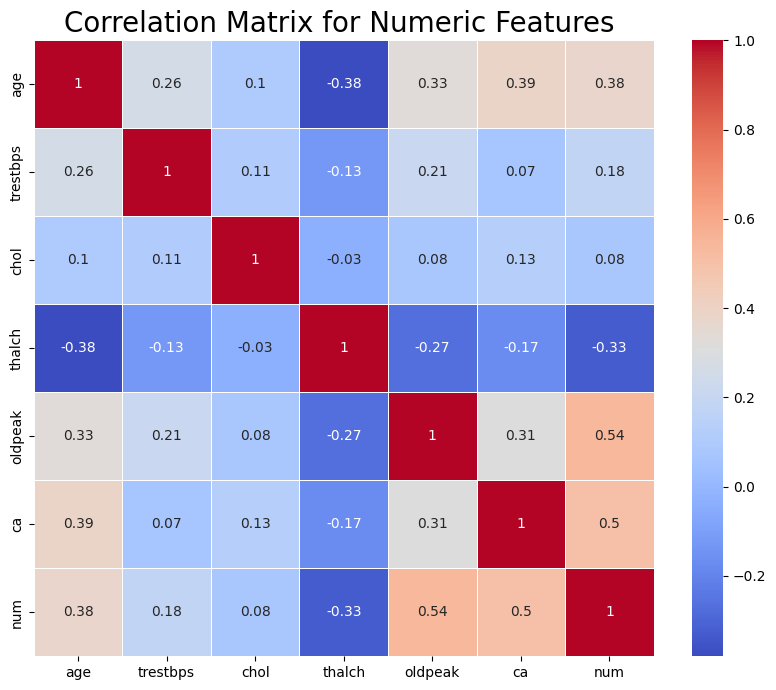

In [53]:
plt.figure(figsize=(10, 8))
correlation_matrix = heart_data.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix for Numeric Features ", size=20)

**Inference:**

From correlation matrix, **ca (Number of major vessels (0-3) colored by fluoroscopy)** is the first feature that has strong correlation with target value, with **oldpeak (ST Depression)** in second place and **age** in the third place.

####6.2.3 Categorical features vs Target

Chi-square statistic for sex: 65.9822706513826
p-value for sex: 1.5977088721905247e-13


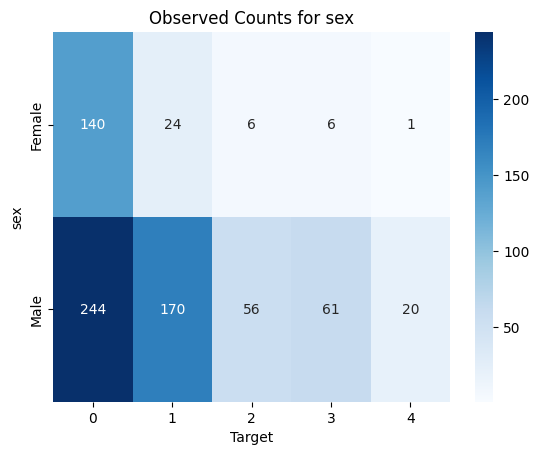

Chi-square statistic for cp: 212.4106179794831
p-value for cp: 8.869629556756493e-39


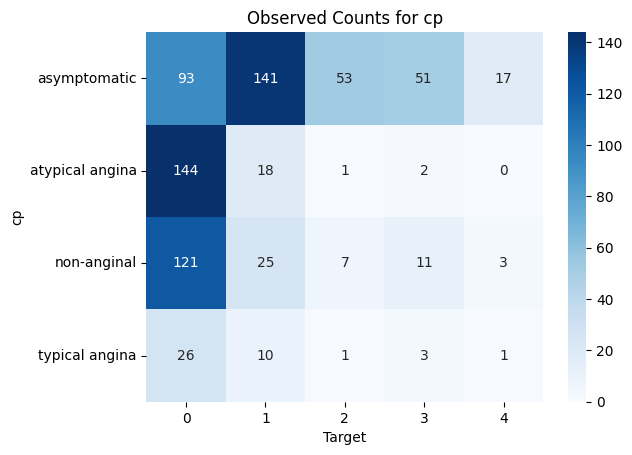

Chi-square statistic for fbs: 28.39522630288068
p-value for fbs: 1.03712317210912e-05


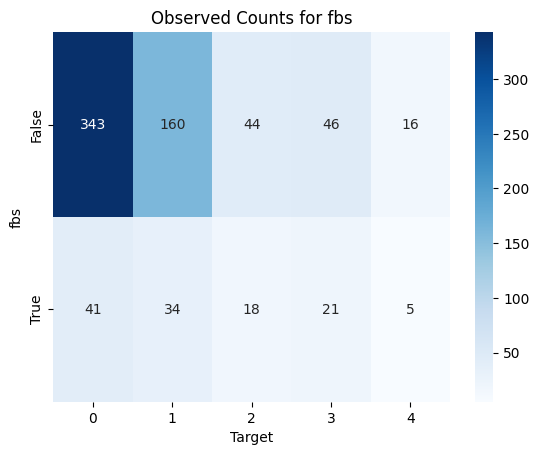

Chi-square statistic for restecg: 41.2837747903622
p-value for restecg: 1.8447365567425365e-06


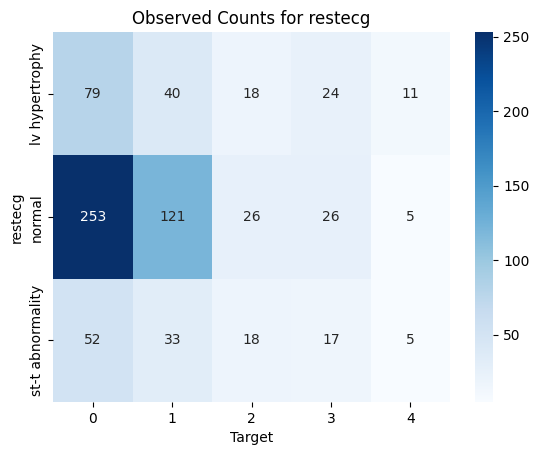

Chi-square statistic for exang: 193.99196328364988
p-value for exang: 7.351715189423547e-41


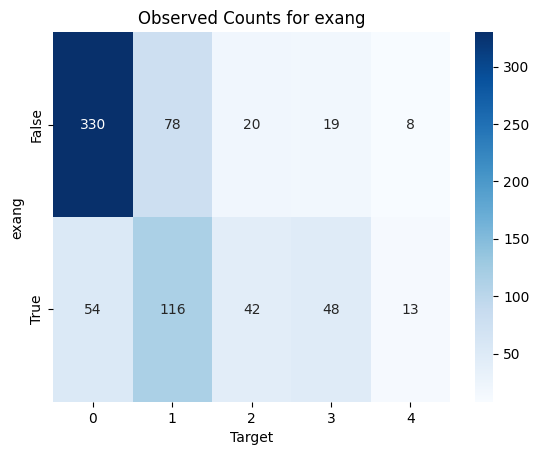

Chi-square statistic for slope: 277.65236279351177
p-value for slope: 2.329360298164149e-55


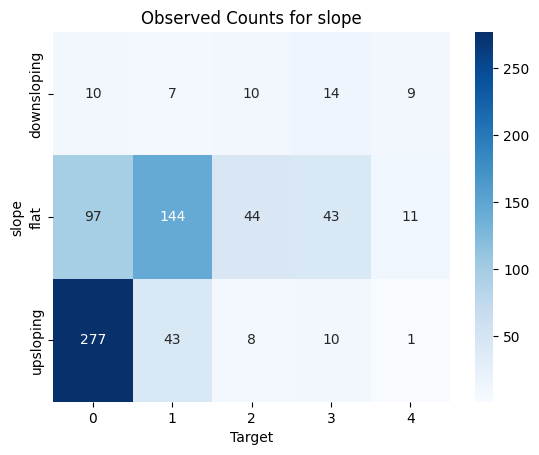

Chi-square statistic for ca: 278.0724782554775
p-value for ca: 1.8602620639194015e-52


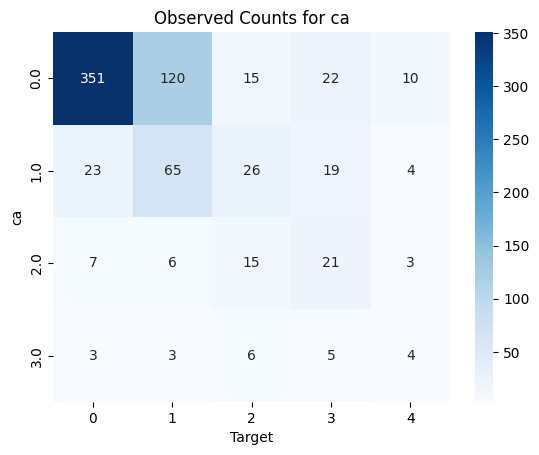

Chi-square statistic for thal: 287.4941408523485
p-value for thal: 1.8844346829093973e-57


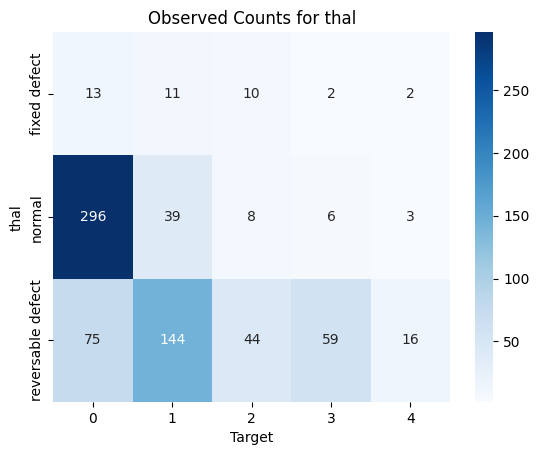

In [54]:
from scipy.stats import chi2_contingency

for cat_feature in categorical_features:
    observed = pd.crosstab(heart_data[cat_feature], heart_data['num'])

    # Perform Chi-square test
    chi2, p, dof, expected = chi2_contingency(observed)

    print("Chi-square statistic for {}: {}".format(cat_feature, chi2))
    print("p-value for {}: {}".format(cat_feature, p))

    # Visualize the observed counts
    sns.heatmap(observed, annot=True, cmap='Blues', fmt='d')
    plt.title('Observed Counts for {}'.format(cat_feature))
    plt.xlabel('Target')
    plt.ylabel(cat_feature)
    plt.show()

**Inferences:**
1. **Sex :** There are 170 Men patients with level 1 heart dissease, and 20 Men patients has level 4 heart dissease, while most of Men patients doesn't have heart dissease.
2. **Cp :** Most of patients with asymptomatic chest pain have heart dissease with 141 patients with level 1, 53 patients with level 2, 51 patients with level 3, and 17 patients with level 4 heart dissease. While most of patients with atypical angina don't have heart dissease.
3. **Fbs :** Majority of patients without fasting blood sugar > 120 mg/dl, don't have heart dissease,but most of patients with fasting blood sugar > 120 mg/dl, have heart dissease
4. **Restecg (Resting Electrocardiographic Results) :** Most of patients with normal restecg don't have heart dissease while majority patients with IV Hyperthropy and st-abnormality have heart dissease
5. **Exang (Exercise-Induced Angina) :** Majority of patients without excercise-induced angina don't have heart dissease  while most of patients with it have level 1 heart dissese (116 patients)
6. **Slope (The slope of the peak exercise ST segment) :** Majority patients with slope flat have heart dissease from level 1 (142 patients), level 2 & level 3 ( both 44 patients) and level 4 (11 patients), while most of patient with upslopping don't have heart dissease
7. **Ca (Number of major vessels (0-3) colored by fluoroscopy) :**
Majority of patient with 0 major vessels don't have heart dissease, while the most patients with 1,2,3 level have heart dissesase
8. **Thal (Thalassemia) :** Most of patients with reversible defect have heart dissease, while patients with normal thal don't have heart dissease

##7. Machine Learning Model

###7.1. Encoded Categorical Features

Encodinge Categorical Features using Label Encoder function

In [55]:
# Identify the unique values in each categorical column.
for col in heart_data.columns:
    if heart_data[col].dtype == 'object' or heart_data[col].dtype == 'category':
        print(col, ":", heart_data[col].unique(), '\n')

sex : ['Male' 'Female'] 

cp : ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina'] 

fbs : [True False] 

restecg : ['lv hypertrophy' 'normal' 'st-t abnormality'] 

exang : [False True] 

slope : ['downsloping' 'flat' 'upsloping'] 

thal : ['fixed defect' 'normal' 'reversable defect'] 



In [56]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']

In [57]:
# Encode the categorical columns using label encoding.
label_encoder = LabelEncoder()

for col in heart_data.columns:
    if heart_data[col].dtype == 'object' or heart_data[col].dtype == 'category':
        heart_data[col] = label_encoder.fit_transform(heart_data[col])

In [58]:
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,3,145.00,233.0,1,0,150.00,0,2.300,0,0.0,0,0
1,67,1,0,160.00,286.0,0,0,108.00,1,1.500,1,3.0,1,2
2,67,1,0,120.00,229.0,0,0,129.00,1,2.600,1,2.0,2,1
3,37,1,2,130.00,250.0,0,1,187.00,0,3.500,0,0.0,1,0
4,41,0,1,130.00,204.0,0,0,172.00,0,1.400,2,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,0,0,127.00,333.0,1,2,154.00,0,0.000,2,0.0,1,1
916,62,1,3,143.02,139.0,0,2,143.50,0,2.058,2,0.0,2,0
917,55,1,0,122.00,223.0,1,2,100.00,0,0.000,1,1.0,0,2
918,58,1,0,148.77,385.0,1,0,144.43,1,2.409,1,0.0,2,0


###7.2. Split Data

Data then split into train and test data using "train_test_split" function with ratio 20% data test.


In [59]:
X = heart_data.drop(["num"],axis =1)
y = heart_data["num"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [60]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 728
Total # of sample in train dataset: 582
Total # of sample in test dataset: 146


###7.3. Model

In this study I would like to use 5 models and select the best model based on accuracy.

Models:
1. Random Forest Calssifier
2. K-Nearest Neighbors
3. Gaussian Naive Bayes
4. Ada Boost, and
5. XG Boost

Models train using GridSearchCV, as Hyperparameter tuning

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.preprocessing import QuantileTransformer, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Define a list of tuples containing different classifiers and their hyperparameters
models = {
        'Random Forest': {
        'model'  : RandomForestClassifier(random_state=42),
        'params' :
        {'model__n_estimators': [50, 100, 200],
         'model__max_depth': [None, 10, 20]}
        },
        'K-Nearest Neighbors': {
        'model'  :KNeighborsClassifier(),
        'params' :
        {'model__n_neighbors': [3, 5]},
        },
        'GaussianNB': {
        'model'  : GaussianNB(),
        'params' :
        {},
        },
        'Ada Boost': {
        'model': AdaBoostClassifier(random_state=42),
        'params': {
        'model__n_estimators': [50, 100, 200],
        'model__learning_rate': [0.05, 0.1, 0.5]
        },
        },
        'XG Boost': {
        'model': XGBClassifier(random_state=42),
        'params':
        {
        'model__n_estimators': [50, 100, 200],
        'model__learning_rate': [0.05, 0.1, 0.5]
        },
        },
}



In [62]:
# print heading - for display purposes only
def heading(heading):
    print('-' * 50)
    print(heading)
    print('-' * 50)

In [63]:
%%time
# Initialize a list to store model performance metrics
model_scores = []
# Initialize variables to keep track of the best classification model
# Start with the worst possible accuracy
best_accuracy = -float('inf')
best_classifier = None

# Iterate over the configured models
for name, model in models.items():
    # Set up a pipeline with data scaling and the current model
    pipeline = Pipeline([
        ('scaler', QuantileTransformer(random_state=42, output_distribution='normal')),
        ('model', model['model'])
    ])

    # Create a GridSearchCV object to tune model hyperparameters
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=model['params'],
        cv=5,  # Number of cross-validation folds
    )

    # Fit the GridSearchCV object to the training data
    grid_search.fit(X_train, y_train)
    # Predict on the test set using the best found model
    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Append performance metrics for the current model to the list
    model_scores.append({
        'Model': name,
        'accuracy': accuracy,
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1': f1_score(y_test, y_pred, average='weighted'),
    })

    # Initialize variables to keep track of the best classifier model
    # Check if this model has the best R2 score so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_classifier = grid_search.best_estimator_

# Sort the models based on the Model name (alphabetically)
sorted_models = sorted(model_scores, key=lambda x: x['Model'], reverse=False)
# Convert the sorted model performance list to a DataFrame for display
metrics = pd.DataFrame(sorted_models)
# Identify the best performing model based on the accuracy score
best_class_model = max(sorted_models, key=lambda x: x['accuracy'])

# Use a custom function 'heading' to display the heading
heading("Multiclass Classifier Models Performance")
# Display the metrics DataFrame with rounded values for readability
metrics.round(2)


--------------------------------------------------
Multiclass Classifier Models Performance
--------------------------------------------------
CPU times: user 46.6 s, sys: 578 ms, total: 47.2 s
Wall time: 41.1 s


,Model,accuracy,precision,recall,f1
0,Ada Boost,0.77,0.78,0.77,0.75
1,GaussianNB,0.64,0.71,0.64,0.67
2,K-Nearest Neighbors,0.71,0.69,0.71,0.70
3,Random Forest,0.71,0.68,0.71,0.70
4,XG Boost,0.70,0.67,0.70,0.69


In [64]:
# Print the best model's performance metrics
heading("BEST MULTICLASS CLASSIFIER MODEL PERFORMANCE")

print(f"Model: {best_class_model['Model']}")
print(f"Accuracy: {best_class_model['accuracy']:.2f}")
print(f"Precision: {best_class_model['precision']:.2f}")
print(f"Recall: {best_class_model['recall']:.2f}")
print(f"F1: {best_class_model['f1']:.2f}")

--------------------------------------------------
BEST MULTICLASS CLASSIFIER MODEL PERFORMANCE
--------------------------------------------------
Model: Ada Boost
Accuracy: 0.77
Precision: 0.78
Recall: 0.77
F1: 0.75


The best model for this data is Random Forest Classifier with 76% accuracy

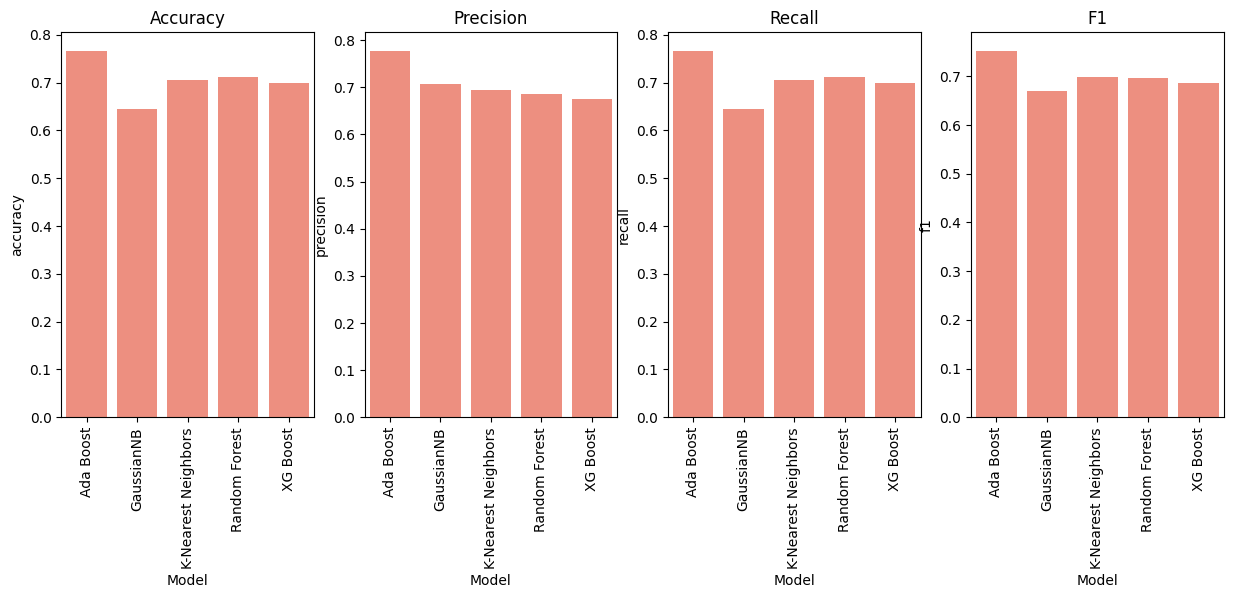

In [65]:
# Make bar plots for the model performance metrics
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
sns.barplot(data=metrics, x='Model', y='accuracy', color='#ff826e')
plt.xticks(rotation=90)
plt.title('Accuracy')
plt.subplot(1, 4, 2)
sns.barplot(data=metrics, x='Model', y='precision', color='#ff826e')
plt.xticks(rotation=90)
plt.title('Precision')
plt.subplot(1, 4, 3)
sns.barplot(data=metrics, x='Model', y='recall', color='#ff826e')
plt.xticks(rotation=90)
plt.title('Recall')
plt.subplot(1, 4, 4)
sns.barplot(data=metrics, x='Model', y='f1', color='#ff826e')
plt.xticks(rotation=90)
plt.title('F1')
plt.show()